In [2]:
import pandas as pd

data = pd.read_csv('open_ave_data.csv',nrows=10000)
print(data.head(3))


   Unnamed: 0                                         ReportText  \
0           0  EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...   
1           1  EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...   
2           2  EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...   

                                            findings  \
0  FINDINGS: Lungs/Pleura: No focal opacities evi...   
1  FINDINGS: Lungs/Pleura: No focal opacities evi...   
2  FINDINGS: Lungs/Pleura: No focal opacities evi...   

                         clinicaldata  \
0       CLINICAL HISTORY: Cough. \n\n   
1  CLINICAL HISTORY: CHEST PAIN. \n\n   
2  CLINICAL HISTORY: CHEST PAIN. \n\n   

                                            ExamName  \
0  EXAM: CHEST RADIOGRAPHY EXAM DATE: 06/01/2019 ...   
1  EXAM: CHEST RADIOGRAPHY EXAM DATE: 05/23/2020 ...   
2  EXAM: CHEST RADIOGRAPHY EXAM DATE: 12/13/2019 ...   

                                          impression  
0      IMPRESSION: Normal 2-view chest radiography.   
1 

<Axes: >

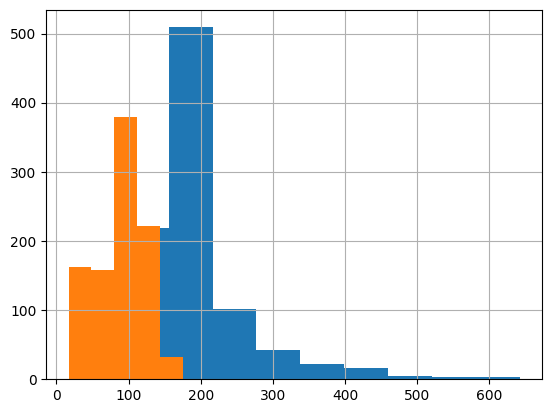

In [35]:
data['findings'].str.len().hist()
data['ExamName'].str.len().hist()

In [28]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

In [29]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

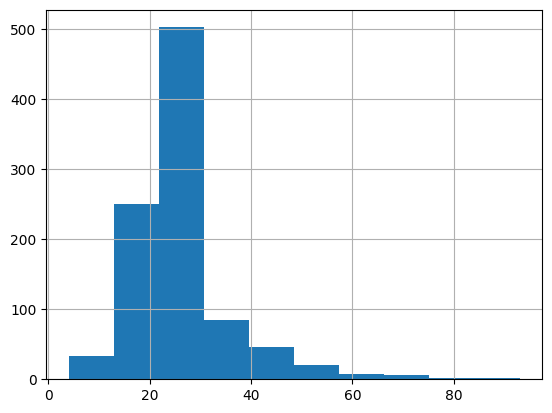

In [30]:
plot_word_number_histogram(data['findings'])

In [31]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x: [len(i) for i in x]).\
        map(lambda x : np.mean(x)).\
        hist()

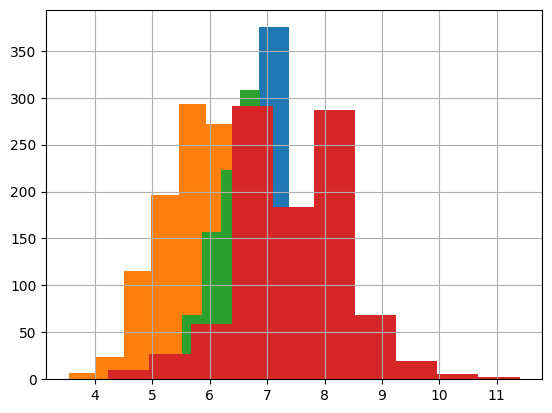

In [41]:
plot_word_length_histogram(data['findings'])
plot_word_length_histogram(data['ExamName'])
plot_word_length_histogram(data['ReportText'])
plot_word_length_histogram(data['impression'])

In [2]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import pandas as pd
data = pd.read_csv('open_ave_data.csv',nrows=10000)

import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    from collections import defaultdict
    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top = sorted(dic.items(), key = lambda x:x[1], reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

In [ ]:
plot_top_stopwords_barchart(data['impression'])

In [11]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import Counter

def plot_top_non_stopwords_barchart(text):
    stop = set(stopwords.words('english'))

    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    
    sns.barplot(x=y, y=x)

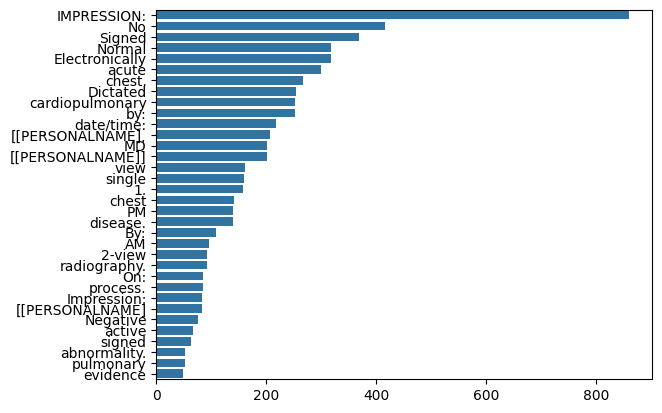

In [12]:
plot_top_non_stopwords_barchart(data['impression'])

In [9]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

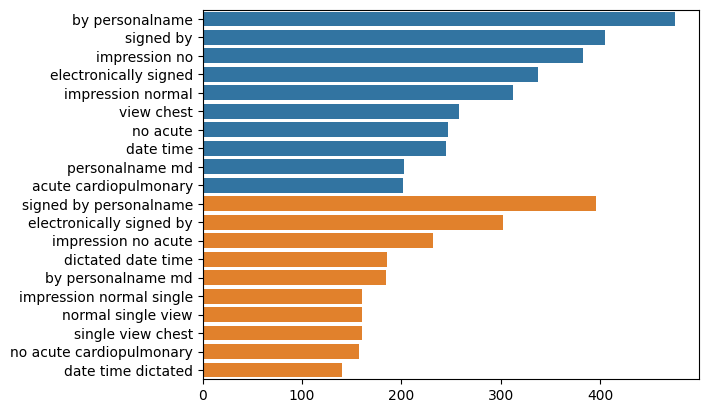

In [10]:
import pandas as pd
data = pd.read_csv('open_ave_data.csv',nrows=10000)
plot_top_ngrams_barchart(data['impression'], 2)
plot_top_ngrams_barchart(data['impression'], 3)

In [6]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim


def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

In [7]:
import pandas as pd
data = pd.read_csv('open_ave_data.csv',nrows=10000)
lda_model, bow_corpus, dic = get_lda_objects(data['impression'])
lda_model.show_topics()
plot_lda_vis(lda_model, bow_corpus, dic)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.097482  0.089286       1        1  32.542198
2     -0.151793  0.091988       2        1  23.065619
0     -0.053855 -0.217422       3        1  22.983164
3      0.303130  0.036149       4        1  21.409019, topic_info=           Term        Freq       Total Category  logprob  loglift
2        Normal  275.000000  275.000000  Default  30.0000  30.0000
28     Dictated  235.000000  235.000000  Default  29.0000  29.0000
3         chest  352.000000  352.000000  Default  28.0000  28.0000
37    date/time  197.000000  197.000000  Default  27.0000  27.0000
13         view  140.000000  140.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
202  CONCLUSION    4.492127   10.466875   Topic4  -5.9222   0.6955
111         The    4.404251   10.587716   Topic4  -5.9419   0.6642
78      opacity    6.163463   28.837173   Topic4  -5.6058  -0.0017
38      finding    5.561746   34.605708   Topic4  -5.7086  -0.2867
9    Impression    5.619121   75.414480   Topic4  -5.6983  -1.0555

[220 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
696       1  0.751758  01/10/2017
715       4  0.771072  02/23/2016
33        2  0.891151  02/24/2019
246       4  0.771040  04/13/2019
903       4  0.770973  05/04/2018
...     ...       ...         ...
206       1  0.845909     visible
17        3  0.876287      volume
471       2  0.836012     wording
131       2  0.243493       x-ray
131       4  0.730480       x-ray

[252 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


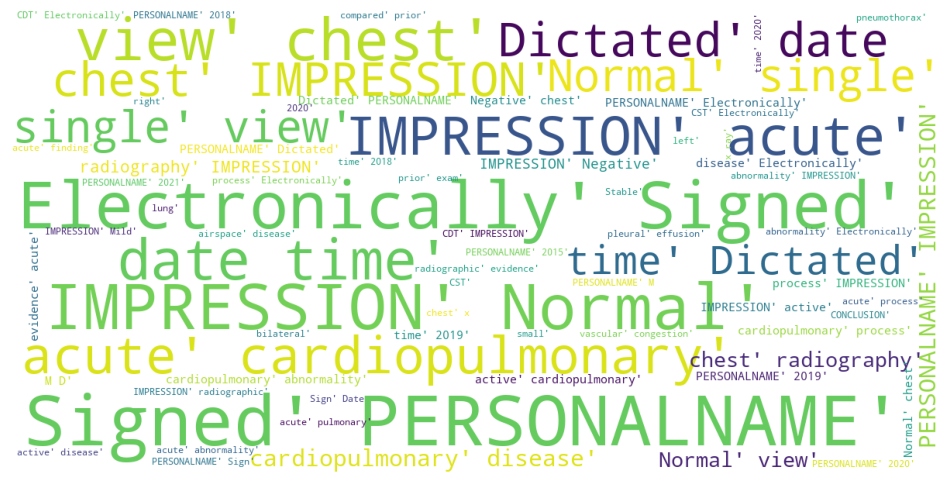

In [2]:
import pandas as pd
data = pd.read_csv('open_ave_data.csv',nrows=10000)

plot_wordcloud(data['impression'])

In [3]:
import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\19294\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


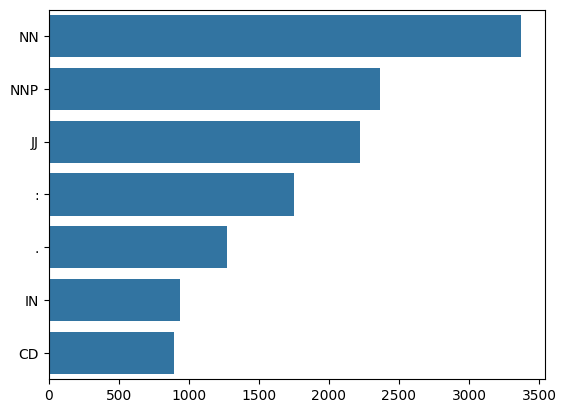

In [4]:
plot_parts_of_speach_barchart(data['impression'])